### Assignment 3 - Logistic Regression

In [ ]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In this assignment, we will build logistic regression models to detect accounting fraud using financial statement features. <br>
The data was collected by Bao et al. (2020) based on the detected material accounting misstatements disclosed in the SEC’s Accounting and Auditing Enforcement Releases (AAERs). <br>
The dataset covers all publicly listed U.S. firms over the period 1990– 2014. The variable name of the fraud label is "misstate" (1 denotes fraud, and 0 denotes non-fraud). <br>
We will use both raw financial data from the financial statements and the financial ratios that are used to evaluate the financial performance of a company for detection.<br>

You may find the description of variables in the Word document.

1. Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

2. Read in the dataset and display basic information about the dataset.

In [ ]:
df = pd.read_csv('/content/AccountingFraud.csv')
df.head()
df.info()
df.columns

,fyear,misstate,act,ap,at,ceq,che,cogs,csho,dlc,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,0,10.047,3.736,32.335,6.262,0.002,30.633,2.526,3.283,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,0,1.247,0.803,7.784,0.667,0.171,1.125,3.556,0.021,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,0,55.040,3.601,118.120,44.393,3.132,107.343,3.882,6.446,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,0,24.684,3.948,34.591,7.751,0.411,31.214,4.755,8.791,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,0,17.325,3.520,27.542,-12.142,1.017,32.662,6.735,32.206,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146045 entries, 0 to 146044
Data columns (total 44 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        146045 non-null  int64  
 1   misstate     146045 non-null  int64  
 2   act          146045 non-null  float64
 3   ap           146045 non-null  float64
 4   at           146045 non-null  float64
 5   ceq          146045 non-null  float64
 6   che          146045 non-null  float64
 7   cogs         146045 non-null  float64
 8   csho         146045 non-null  float64
 9   dlc          146045 non-null  float64
 10  dltis        146045 non-null  float64
 11  dltt         146045 non-null  float64
 12  dp           146045 non-null  float64
 13  ib           146045 non-null  float64
 14  invt         146045 non-null  float64
 15  ivao         146045 non-null  float64
 16  ivst         146045 non-null  float64
 17  lct          146045 non-null  float64
 18  lt           146045 non-

Index(['fyear', 'misstate', 'act', 'ap', 'at', 'ceq', 'che', 'cogs', 'csho',
       'dlc', 'dltis', 'dltt', 'dp', 'ib', 'invt', 'ivao', 'ivst', 'lct', 'lt',
       'ni', 'ppegt', 'pstk', 're', 'rect', 'sale', 'sstk', 'txp', 'txt',
       'xint', 'prcc_f', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv',
       'soft_assets', 'ch_cs', 'ch_cm', 'ch_roa', 'issue', 'bm', 'dpi', 'reoa',
       'EBIT', 'ch_fcf'],
      dtype='object')

3. Explore the variable 'misstate' with a graph. What do you observe?

<Axes: xlabel='misstate'>

Text(0.5, 0, 'misstate')

Text(0, 0.5, 'Number of Fraud Cases')

Text(0.5, 1.0, 'Number of Fraud Cases')

([<matplotlib.axis.XTick at 0x7c8710dc0e10>,
 [Text(0, 0, 'Non-fraud'), Text(1, 0, 'Fraud')])

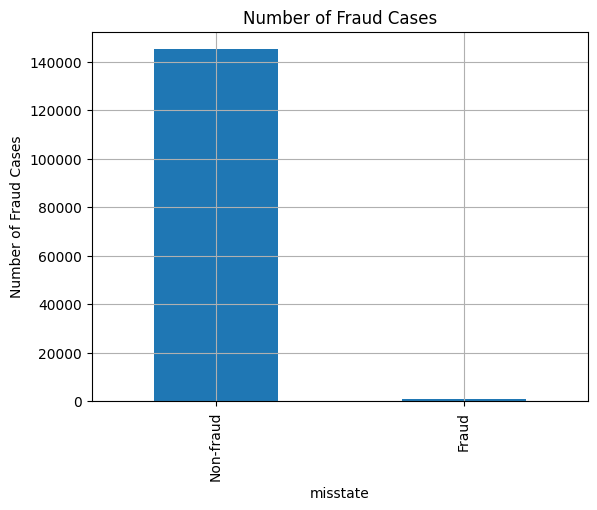

In [ ]:

df2 = df['misstate'].value_counts()

df2.plot(kind='bar')
plt.xlabel('misstate')
plt.ylabel('Number of Fraud Cases')
plt.title('Number of Fraud Cases')
plt.xticks([0, 1], ['Non-fraud', 'Fraud'])
plt.grid(True)
plt.show()

4. Next we sum the number of fraud cases by year and make a line graph.<br>
First we need to use .groupby() method to do the sum. We did not go over this in class. I explain here.
Then you can use the result to create a line graph.

In [ ]:
df1 = df.groupby('fyear')['misstate'].sum().reset_index()

# Groupby method group the data observations by the given variable 'fyear'
# into groups.
# Then the sum() will sum the variable 'misstate'
# reset_index() is to transform the result into a dataframe

Save the output of the code above and make a line graph based on it. What do you observe?

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Fraud Cases')

Text(0.5, 1.0, 'Number of Fraud Cases by Year')

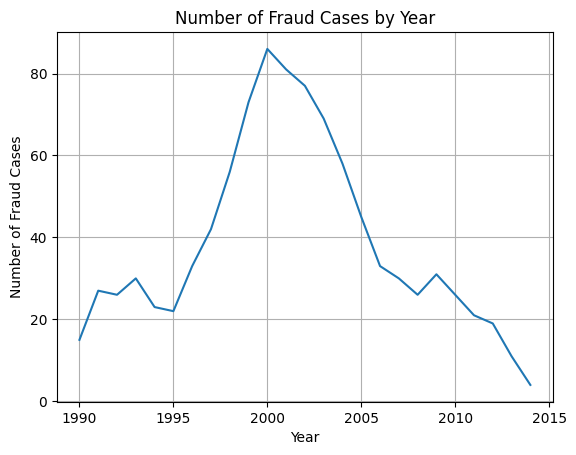

In [ ]:
plt.plot(df1['fyear'],df1['misstate'])
plt.xlabel('Year')
plt.ylabel('Number of Fraud Cases')
plt.title('Number of Fraud Cases by Year')
plt.grid(True)
plt.show()

5. The percentage of fraud cases is really small. To have better prediction power, we intend to oversample the fraud cases to 10% of the sample. Please run the code below. Pay attention to how I name the datasets. Change them to adapt to your cases. <br>
You may notice that after oversampling, the number of fraud cases increased.

In [ ]:
# Separate into minority and majority
minority_class = df[df['misstate'] == 1]
majority_class = df[df['misstate'] == 0]

# Count minority and majority samples
minority_count = len(minority_class)
majority_count = len(majority_class)
print("Original class distribution:", df['misstate'].value_counts())

###############################
# Desired ratio = 10% / 90%   #
###############################
# For a 10/90 ratio, 1:9 (minority : majority)
# If we have 'N' majority samples, we want M' = N/9 minority samples.

RATIO = 9  # 1 minority : 9 majority
majority_N = majority_count

# Calculate how many minority samples we need to achieve 10/90 ratio
minority_needed = int(np.ceil(majority_N / RATIO))

# If we already have enough minority samples, no oversampling needed
# Otherwise, sample (with replacement) from the minority to get the required count
if minority_needed <= minority_count:
    oversampled_minority = minority_class
else:
    # Randomly sample with replacement to reach minority_needed
    oversampled_minority = minority_class.sample(n=minority_needed, replace=True, random_state=0)

# Combine the new minority subset with the entire majority
Fraud_oversampled = pd.concat([oversampled_minority, majority_class])

# Shuffle the dataset
Fraud_oversampled = Fraud_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print("New class distribution:", Fraud_oversampled['misstate'].value_counts())

Original class distribution: misstate
0    145081
1       964
Name: count, dtype: int64
New class distribution: misstate
0    145081
1     16121
Name: count, dtype: int64


6. Missing values. You may notice that some variables have missing values. <br>
Ideally, we need to handle missing values carefully. We will explore that in the future if we have the chance.<br>
For now, we just simply drop the observations with missing values. Use dropna() to do that.

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126483 entries, 0 to 146044
Data columns (total 44 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fyear        126483 non-null  int64  
 1   misstate     126483 non-null  int64  
 2   act          126483 non-null  float64
 3   ap           126483 non-null  float64
 4   at           126483 non-null  float64
 5   ceq          126483 non-null  float64
 6   che          126483 non-null  float64
 7   cogs         126483 non-null  float64
 8   csho         126483 non-null  float64
 9   dlc          126483 non-null  float64
 10  dltis        126483 non-null  float64
 11  dltt         126483 non-null  float64
 12  dp           126483 non-null  float64
 13  ib           126483 non-null  float64
 14  invt         126483 non-null  float64
 15  ivao         126483 non-null  float64
 16  ivst         126483 non-null  float64
 17  lct          126483 non-null  float64
 18  lt           126483 non-null 

7. Now let's fit logistic regression models. First, we only use the 14 financial ratio variables as the independent variables. You may find the definitions of them in the Word document.

Prepare the data.

In [ ]:
import patsy
y, x = patsy.dmatrices('misstate ~ dch_wc + ch_rsst + dch_rec + dch_inv+ soft_assets + dpi + ch_cs + ch_cm + ch_roa + ch_fcf + reoa + EBIT + issue + bm',
                      data = df, return_type = 'dataframe')
x.head()
y.head()

x.columns
y.columns

,Intercept,dch_wc,ch_rsst,dch_rec,dch_inv,soft_assets,dpi,ch_cs,ch_cm,ch_roa,ch_fcf,reoa,EBIT,issue,bm
0,1.0,0.069595,0.046043,0.041935,0.033034,0.312448,0.873555,0.095082,0.082631,-0.019761,-0.042140,0.167620,0.161961,1.0,0.413170
1,1.0,-0.065604,-0.240937,-0.006248,-0.026684,0.315904,0.745139,0.188832,-0.211389,-0.117832,0.100228,-0.428957,-0.157888,1.0,0.157887
2,1.0,0.092822,0.020143,0.002156,0.002746,0.605342,1.015131,0.097551,-0.105780,0.091206,0.066348,0.394768,0.063681,1.0,2.231337
3,1.0,0.014060,0.035120,0.035583,0.008332,0.793068,1.026261,-0.005725,-0.249704,0.017545,-0.017358,0.094822,0.088347,1.0,1.043582
4,1.0,-0.540503,-0.575325,-0.102153,-0.222022,0.869182,0.598443,-0.231536,-1.674893,-0.466667,0.130349,-0.942379,-0.700821,0.0,-1.602508


,misstate
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Index(['Intercept', 'dch_wc', 'ch_rsst', 'dch_rec', 'dch_inv', 'soft_assets',
       'dpi', 'ch_cs', 'ch_cm', 'ch_roa', 'ch_fcf', 'reoa', 'EBIT', 'issue',
       'bm'],
      dtype='object')

Index(['misstate'], dtype='object')

8. Fit the model using statsmodels. Show the results. Which variables are not significant?

In [ ]:
model = sm.Logit(y, x)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.040796
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:               misstate   No. Observations:               126483
Model:                          Logit   Df Residuals:                   126468
Method:                           MLE   Df Model:                           14
Date:                Thu, 20 Feb 2025   Pseudo R-squ.:                 0.04303
Time:                        04:45:23   Log-Likelihood:                -5160.1
converged:                       True   LL-Null:                       -5392.1
Covariance Type:            nonrobust   LLR p-value:                 3.716e-90
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -7.1554      0.222    -32.176      0.000      -7.591      -6.720
dch_wc         -0.9463   

These variable are not significant:

dpi (0.555 > 0.05)

ch_cm (0.870 > 0.05)

ch_fcf (0.077 > 0.05)